In [ ]:
# Web Scraping using Python
# https://www.datacamp.com/community/tutorials/web-scraping-using-python

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
# specify url
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [5]:
# parse html
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [6]:
# Get the title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [9]:
# Print out the text
text = soup.get_text()
print(soup.text[:100])








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print


In [10]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [11]:
# for loop to extract and print out only hyperlinks
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
#individual
#team
/results/2017GPTR
/results/summary/2017GPTR10K
#tabs-1
None
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [14]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:5])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>]


In [15]:
# for loop that iterates through table rows and prints out the cells of the rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

In [16]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [17]:
# re
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [18]:
# convert to dataframe
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON, M, TIGARD, OR, 36:21, 5..."
6,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
7,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 37:4..."
8,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 38:34,..."
9,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 39..."


In [ ]:
# Data Manipulation and Cleaning

In [19]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [20]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [21]:
col_labels = soup.find_all('th')

In [22]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [23]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [24]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [25]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]


In [26]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None


In [27]:
df5.shape

(598, 14)

In [28]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


In [29]:
df6 = df5.dropna(axis=0, how='any')

In [30]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [31]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [ ]:
# remove ']'

In [32]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


In [33]:
# Data Analysis and Visualization

In [61]:
# average finish time (in minutes) 
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
h = 1
for i in time_list[0:100]:
    m, s = i.strip(' ').split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

In [62]:
print(time_mins[:10])

[96.35, 96.7, 97.73333333333333, 98.56666666666666, 99.35, 99.81666666666666, 100.06666666666666, 100.08333333333333, 100.28333333333333, 100.35]


In [42]:
m, s = time_list[1].strip(' ').split(':')

In [43]:
m, s

('36', '42')

In [44]:
m

'36'

In [67]:
df7a = df7[0:100]
df7a['Runner_mins'] = time_mins
df7a.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,96.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,96.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,97.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,98.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,99.350000


In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x20fc5879f28>],
 <a list of 1 Text xticklabel objects>)

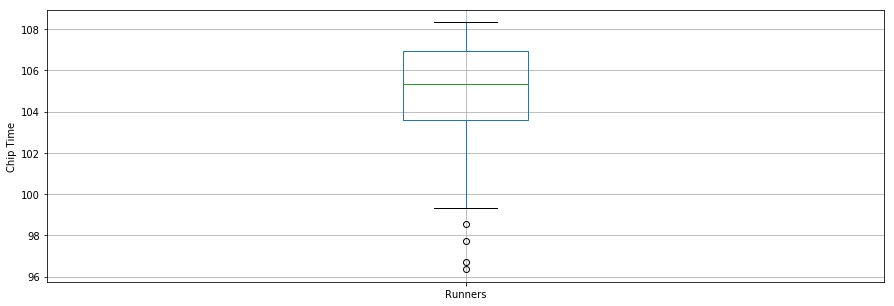

In [69]:
df7a.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

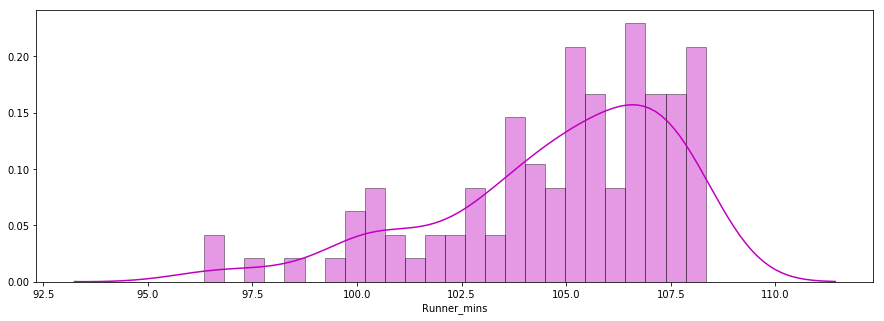

In [70]:
x = df7a['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

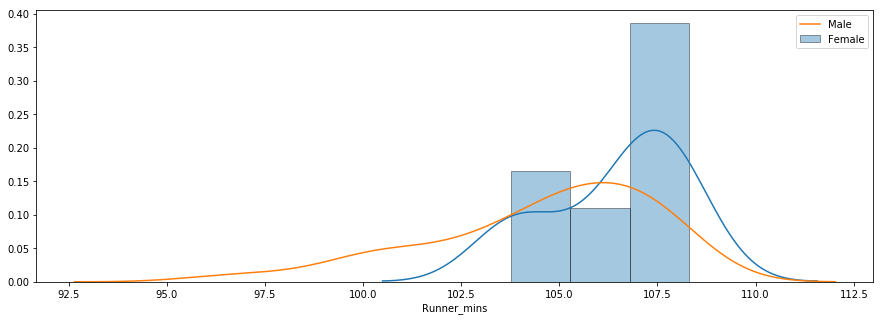

In [71]:
f_fuko = df7a.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7a.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [72]:
g_stats = df7a.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                            \
              count        mean       std         min         25%         50%   
 Gender                                                                         
 F             12.0  106.450000  1.691377  103.766667  105.279167  107.008333   
 M             88.0  104.573674  2.851035   96.350000  102.854167  105.225000   

                                 
                75%         max  
 Gender                          
 F       107.670833  108.300000  
 M       106.791667  108.333333  


Text(0.5,0.98,'')

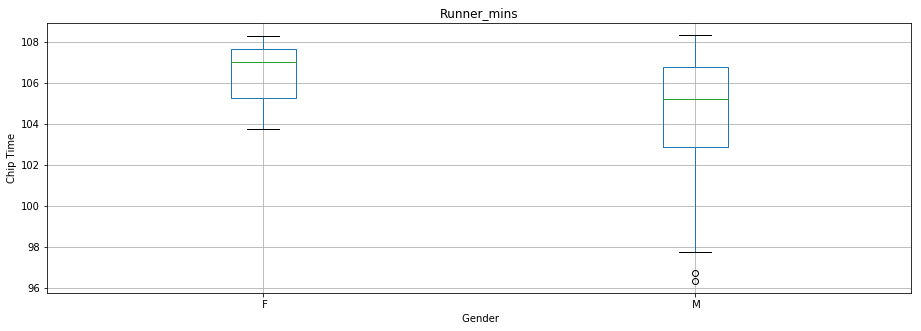

In [73]:
df7a.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

In [ ]:
# https://www.datacamp.com/community/tutorials/web-scraping-using-python

In [ ]:
# need to fixed the data set problems